In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
path = "lung.jpeg"
img = cv2.imread(path,0)

#To display image before equalization
cv2.imshow('image',img)
cv2.waitKey(0)

-1

In [3]:
a = np.zeros((256,),dtype=np.float16)
b = np.zeros((256,),dtype=np.float16)
height, width = img.shape

(array([61., 26., 15.,  9.,  8.,  5.,  1.,  5.,  0.,  2.,  1.,  5.,  0.,
         2.,  0.,  5.,  7.,  4., 16., 12., 14., 12.,  3.,  3.,  8.,  8.,
         5.,  3.,  1.,  2.,  4.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0. ,  16.9,  33.8,  50.7,  67.6,  84.5, 101.4, 118.3, 135.2,
        152.1, 169. , 185.9, 202.8, 219.8, 236.6, 253.5, 270.5, 287.2,
        304.2, 321. , 338. , 355. , 371.8, 388.8, 405.5, 422.5, 439.5,
        456.2, 473.2, 490. , 507. , 524. , 541. , 557.5, 574.5, 591.5,
        608.5, 625.5, 642. , 659. , 676. , 693. , 710. , 726.5, 743.5,
        760.5, 777.5, 794.5, 811. , 828. , 845. ], dtype=float16),
 <a list of 50 Patch objects>)

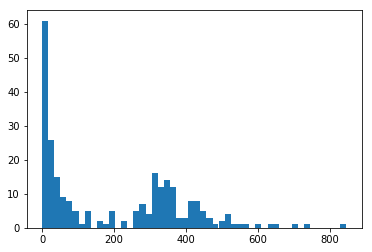

In [4]:
#finding histogram
for i in range(width):
    for j in range(height):
        g = img[j,i]
        a[g] = a[g]+1

# print(a)
plt.hist(a, bins=50)

In [5]:
#performing histogram equalization
tmp = 1.0/(height*width)
b = np.zeros((256,), dtype=np.float16)

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * tmp;
    b[i] = round(b[i] * 255);

[  0   0   0   0   0   0   0   0   1   1   1   1   1   1   2   2   2   2
   2   3   3   3   3   3   4   4   4   4   4   4   4   4   4   4   5   5
   5   5   5   5   6   6   6   6   6   7   7   7   7   7   8   8   8   9
   9  10  10  10  11  11  12  12  12  13  13  14  14  15  16  17  18  19
  20  21  23  24  25  27  28  29  31  32  34  35  37  38  40  41  43  45
  46  48  49  51  52  54  55  57  59  61  62  64  65  67  69  71  72  74
  76  77  79  81  83  84  86  88  90  91  93  95  96  98 100 102 104 105
 107 109 110 112 114 115 117 119 121 122 124 126 128 130 132 134 136 138
 140 142 144 146 149 151 153 155 157 159 161 163 165 168 170 172 175 178
 181 184 187 189 192 194 197 199 201 203 205 207 209 212 214 217 219 222
 226 230 234 237 239 241 243 245 247 248 249 250 251 252 252 253 253 254
 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 25

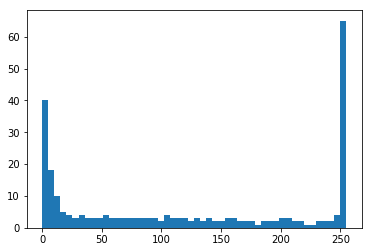

In [6]:
# b now contains the equalized histogram
b=b.astype(np.uint8)

print(b)
plt.hist(b, bins=50)

#Re-map values from equalized histogram into the image
for i in range(width):
    for j in range(height):
        g = img[j,i]
        img[j,i]= b[g]
        

cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()